# Project 2

# Used Vehicle Price Prediction

## Integrantes

- Lupe Pinzón - 200813063
- Javier Lesmes - 200820243
- Viviana Muñóz - 201920081

## Análisis de la base de datos

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [104]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from statistics import mean
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [85]:
data = pd.read_csv('dataTrain_carListings.zip')

In [86]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [87]:
data.tail()

,Price,Year,Mileage,State,Make,Model
499995,16997,2013,40393,TX,BMW,1
499996,11990,2012,91794,WA,Hyundai,Santa
499997,49991,2014,39107,MS,Ford,Super
499998,21888,2010,62556,NH,Dodge,Ram
499999,63973,2017,17653,NJ,Chevrolet,Suburban4WD


In [88]:
data.shape

(500000, 6)

In [89]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

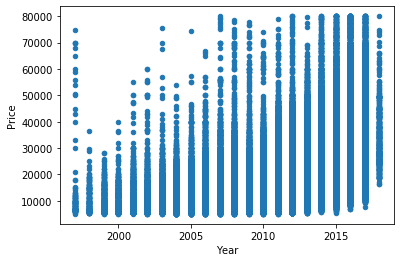

In [90]:
data.plot(kind='scatter', y='Price', x='Year');

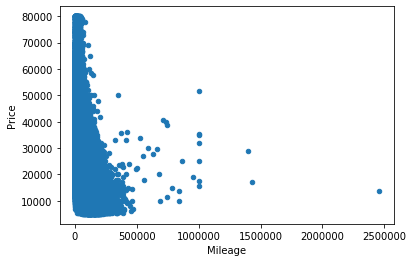

In [91]:
data.plot(kind='scatter', y='Price', x='Mileage');

In [92]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [94]:
len(data['State'].value_counts())

51

In [95]:
data['State'].value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
TX,57153,0.114306
CA,45643,0.091286
FL,42244,0.084488
GA,22790,0.045580
NC,22363,0.044726
IL,21058,0.042116
VA,19851,0.039702
PA,16337,0.032674
NY,15617,0.031234
NJ,15220,0.030440


Como se observa en la tabla anterior, para la variable *State* se tienen 51 categorías; sin embargo, solo tres categorías tienen un participación en la base de datos superior al 5%.

In [ ]:
data_crosstab = pd.crosstab(data['grade'], 
                            data['loan_status'],  
                               margins = False) 
print(data_crosstab) 

In [96]:
len(data['Make'].value_counts())

38

In [97]:
data['Make'].value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
Ford,78627,0.157254
Chevrolet,72900,0.145800
Toyota,57485,0.114970
Honda,41490,0.082980
Jeep,30413,0.060826
GMC,25963,0.051926
Kia,20347,0.040694
Dodge,20178,0.040356
Hyundai,18856,0.037712
Lexus,17127,0.034254


Como se observa en la tabla anterior, aunque se tienen 38 categorías para la variable *Make* menos de la mitad tiene una participación mayor al 2%.

In [98]:
len(data['Model'].value_counts())

525

In [99]:
data['Model'].value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
Silverado,22562,0.045124
Grand,15382,0.030764
Sierra,10423,0.020846
Accord,9145,0.018290
F-1504WD,8379,0.016758
...,...,...
Element2WD,69,0.000138
MuranoS,68,0.000136
PathfinderSE,66,0.000132
RX-84dr,66,0.000132


A partir de la tabla anterior es posible observar que, de las 525 categorías que se tienen para la variable *Model* solo tres tiene una participación mayor al 2%. El modelo con mayor participación 4.5% es Silverado.

# Exercise P2.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the model using K-Fold (K=10) cross-validation
- 25% - Notebook explaining the modeling process


## 1. Configuración de la base y selección de variables

Para inciar ajustamos la base de datos con la información requerida, creando la variables dummy necesarias

In [101]:
data['HighPrice'] = (data['Price'] > data['Price'].mean()).astype(int)
data = data.drop(['Price'], axis=1)
data.head()

,Year,Mileage,State,Make,Model,HighPrice
0,2014,31909,MD,Nissan,MuranoAWD,1
1,2016,25741,KY,Chevrolet,CamaroCoupe,1
2,2016,24633,SC,Hyundai,Santa,0
3,2012,84026,OK,Jeep,Grand,0
4,2013,22816,TN,Jeep,Wrangler,1


In [102]:
data =data.join(pd.get_dummies(data['State'],prefix='S'))
data =data.join(pd.get_dummies(data['Make'],prefix='M'))
data =data.join(pd.get_dummies(data['Model'],prefix='Mo'))
data = data.drop(['State', 'Make','Model'], axis=1)

y = data['HighPrice']
X = data.drop(['HighPrice'], axis=1)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape

(335000, 616)

Teniendo en cuenta la transformación de la variables categorícas, la base ahora cuenta con 616 variables de las cuales 613 son dummies. Así las cosas, para reducir la dimensionalidad y enteder que variables son importante para la estimación del modelo procedemos incialmente a usar un Random Forest.

In [105]:
names = list(X)
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)

# summarize feature importance
importance = pd.DataFrame (sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_),names), 
             reverse=True))

,0,1
0,0.2316,Mileage
1,0.1468,Year
2,0.0235,Mo_Silverado
3,0.0140,M_Kia
4,0.0138,Mo_Wrangler


In [112]:
importance

,0,1
0,0.2316,Mileage
1,0.1468,Year
2,0.0235,Mo_Silverado
3,0.0140,M_Kia
4,0.0138,Mo_Wrangler
...,...,...
611,0.0000,Mo_1500Tradesman
612,0.0000,M_Suzuki
613,0.0000,M_Pontiac
614,0.0000,M_Mercury


Los resultados del modelo Random forest muestran que las varibles más influyentes en el modelo son *Mileage* y *year*, seguidas de algunos modelos como Silverado (modelo con mayor participación en la base). Concretamente, para eliminar las variables que no afectan el modelo utilizaremos las variables que tienen una importancia mayor o igual al 0.01. 

Es relevante indicar que la selección de este umbral obedece a temas computacionales, es decir, a maximizar el desempeño en la ejecución del modelo. Para el desarrollo de este punto se  intentaron umbrales es bajos, que arrojan un número mayor de variables a considerar en la estiamación de los modelos, sin embargo, estos tomaron un tiempo considerable.

In [124]:
importance_final = importance[importance[0] >=0.003]
features = importance_final.iloc[:,1]
features.head(60)

0                Mileage
1                   Year
2           Mo_Silverado
3                  M_Kia
4            Mo_Wrangler
5              M_Hyundai
6            Mo_MalibuLT
7           M_Volkswagen
8            Mo_FusionSE
9                  M_GMC
10               M_Lexus
11           Mo_F-1504WD
12               M_Honda
13             Mo_Sierra
14             Mo_Tundra
15          Mo_CorollaLE
16            Mo_CamrySE
17              Mo_Super
18         Mo_EquinoxFWD
19         Mo_CruzeSedan
20              Mo_Grand
21       M_Mercedes-Benz
22                M_Jeep
23                 M_BMW
24              Mo_Civic
25           Mo_EscapeSE
26              Mo_Jetta
27            Mo_FocusSE
28               M_Dodge
29     Mo_F-150SuperCrew
30                M_Ford
31       Mo_PatriotSport
32            Mo_CamryLE
33         Mo_200Limited
34              M_Toyota
35           Mo_CorollaS
36          Mo_Malibu1LT
37           Mo_MalibuLS
38           Mo_F-150XLT
39       Mo_CompassSport


Con el criterio anteriormente descrito, incluiremos en el modelo 10 variables: Mileage, Year, 3 variables de Modelo: Silverado, Wrangler y Funsion SE; y 5 variables de marca: Kia, GMC, Volkswagen, Lexus y Hyundai.

In [116]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# Build RF classifier to use in feature selection
clf2 = RandomForestClassifier(n_estimators=10, random_state=1, n_jobs=-1)

# Build step forward feature selection
sfs1=sfs(clf2,
        k_features=10,
        forward=True,
        floating=False,
        verbose=2,
        scoring='accuracy',
        cv=5,
        n_jobs=-1)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 616 out of 616 | elapsed: 10.9min finished

[2020-06-28 22:56:56] Features: 1/10 -- score: 0.6634029850746268[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 615 out of 615 | elapsed: 21.8min finished

[2020-06-28 23:18:45] Features: 2/10 -- score: 0.6799373134328358[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.9min
[P

In [125]:
data2 = data[features.values]
data2.shape

(500000, 54)

In [126]:
y = data['HighPrice']
X = data2

## 2. Estimación de modelos

Con la nueva base de datos estimamos los siguientes modelos de ensamblaje para encontrar la probablidad de que : Bagging, Random Forest, Boosting, Adaboost, Gradient Boosting, y XGBClassifier.

#### Train y Test

In [127]:
X_trains=[]
y_trains=[]
X_tests=[]
y_tests=[]
n=X.shape[0]

for i in range(0,10):
  units=(range(0,int(n/10)))
  indices=list(np.array(units)+i*int(n/10))
  X_tests.append(X.loc[indices,:])
  y_tests.append(y.loc[indices])
  X_trains.append(X.drop(index=indices))
  y_trains.append(y.drop(index=indices))

### 1. Bagging

In [128]:
bag=list(range(0,10))
y_pred1=list(range(0,10))
accuracy_bag=list(range(0,10))

for i in range(0,10):
    bag[i]=BaggingClassifier()
    bag[i].fit(X_trains[i], y_trains[i])
    y_pred1[i] = bag[i].predict(X_tests[i])
    accuracy_bag[i]=metrics.accuracy_score(y_pred1[i], y_tests[i])

In [67]:
tabla = np.array([np.arange(5)]*1).T
columns = ['Accuracy']
models = ['Bagging','Random Forest','AdaBoost','GBoost','GXBoost']
Results = pd.DataFrame(tabla, index=models, columns=columns)
Results

,Accuracy
Bagging,0
Random Forest,1
AdaBoost,2
GBoost,3
GXBoost,4


In [68]:
Results.iloc[0,0] = mean(accuracy_bag)
print('Accuracy Bagging=', mean(accuracy_bag))

Accuracy Bagging= 0.695452


### 2. Radom Forest

In [65]:
rfc=list(range(0,10))
y_pred2=list(range(0,10))
accuracy_rfc=list(range(0,10))

for i in range(0,10):
    rfc[i]=RandomForestClassifier()
    rfc[i].fit(X_trains[i], y_trains[i])
    y_pred2[i] = rfc[i].predict(X_tests[i])
    accuracy_rfc[i]=metrics.accuracy_score(y_pred2[i], y_tests[i])

In [69]:
Results.iloc[1,0] = mean(accuracy_rfc)
print('Accuracy RF=', mean(accuracy_rfc))

Accuracy RF= 0.68906


### 3. AdaBoost

In [70]:
adab=list(range(0,10))
y_pred3=list(range(0,10))
accuracy_adab=list(range(0,10))

for i in range(0,10):
    adab[i]=AdaBoostClassifier()
    adab[i].fit(X_trains[i], y_trains[i])
    y_pred3[i] = adab[i].predict(X_tests[i])
    accuracy_adab[i]=metrics.accuracy_score(y_pred2[i], y_tests[i])

In [71]:
Results.iloc[2,0] = mean(accuracy_adab)
print('Accuracy AdaBoost=', mean(accuracy_adab))

Accuracy AdaBoost= 0.68906


### 4. Gradient Boosting

In [72]:
grb=list(range(0,10))
y_pred4=list(range(0,10))
accuracy_grb=list(range(0,10))

for i in range(0,10):
    grb[i]=AdaBoostClassifier()
    grb[i].fit(X_trains[i], y_trains[i])
    y_pred4[i] = grb[i].predict(X_tests[i])
    accuracy_grb[i]=metrics.accuracy_score(y_pred4[i], y_tests[i])

In [73]:
Results.iloc[3,0] = mean(accuracy_grb)
print('Accuracy GBoost=', mean(accuracy_grb))

Accuracy GBoost= 0.74752


### 5. XGBClassifier

In [74]:
xgb=list(range(0,10))
y_pred5=list(range(0,10))
accuracy_xgb=list(range(0,10))

for i in range(0,10):
    xgb[i]=XGBClassifier()
    xgb[i].fit(X_trains[i], y_trains[i])
    y_pred5[i] = xgb[i].predict(X_tests[i])
    accuracy_xgb[i]=metrics.accuracy_score(y_pred5[i], y_tests[i])

In [75]:
Results.iloc[4,0] = mean(accuracy_xgb)
print('Accuracy XGBoost=', mean(accuracy_xgb))

Accuracy XGBoost= 0.753448


### Conclusión

In [76]:
Results

,Accuracy
Bagging,0.695452
Random Forest,0.689060
AdaBoost,0.689060
GBoost,0.747520
GXBoost,0.753448


La tabla de resultados muestra que, de todos los métodos de ensamblaje cosiderados, XGBoost arroja los mejores resultados en términos de Accuracy, utilizando un Cross Validation de 10 folds. No obstante, a continuación, procedemos a calibrar los parámetros de los modelos Random Forest y XGBoost para evaluar de nuevo los resultados y seleccionar el mejor modelo.

De acuerdo con los resultados del cross calidation score, el modelo con mejor desempeño es el XGBClassifier:  
~ Bagging: 0.694  
~ Random Forest: 0.692  
~ AdaBoost: 0.742  
~ Gradient Boosting: 0.748  
~ XGBClassifier: 0.752  

Antes de continuar con el modelo XGBClassifier calibraremo las parametros del Random Forest para evaluar el nuevo resultado:

### Calibración modelos

### Random Forest

En relación con el modelo de Random Forest se calibran dos parámentros: *n_estimators* y *max_features*; el primero hace referencia al número de parámetros a ser considerados en la estimación, mientras que el segundo se refiere al número de variables que debe considerarse en cada split.

#### Tuning n_estimators

Text(0, 0.5, 'Accuracy')

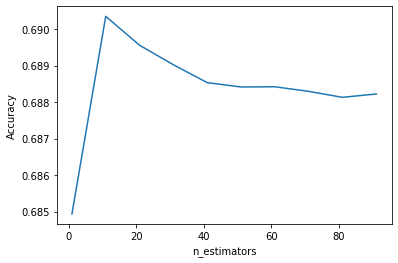

In [78]:
estimator_range = range(10, 100, 10)
accuracy_scores = []

for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

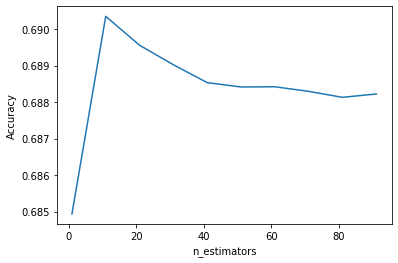

In [82]:
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy');

Dado que el mejor valor es 10, evaluaremos los valores inferiores

Text(0, 0.5, 'Accuracy')

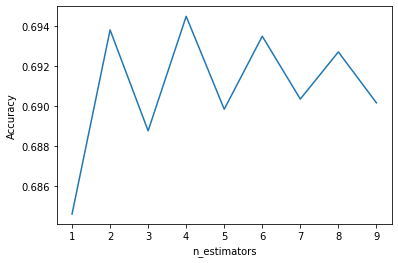

In [35]:
estimator_range = range(1, 10, 1)
accuracy_scores = []

for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

In [ ]:
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

Del grafico podemos concluir que el mejor n_estimators es de 4  

### Tuning max_features

Text(0, 0.5, 'Accuracy')

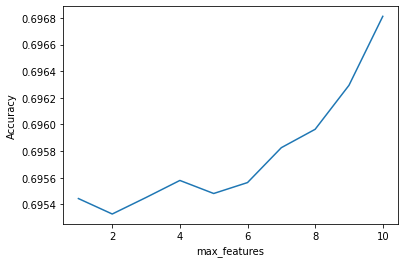

In [39]:
feature_range = range(1, 11)
accuracy_scores = []

for feature in feature_range:
    clf = RandomForestClassifier(n_estimators=4, max_features=feature, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())
    
plt.plot(feature_range, accuracy_scores)
plt.xlabel('max_features')
plt.ylabel('Accuracy')

Del grafico podemos concluir que el el valor optimo de Max_features es 10.

In [41]:
clf = RandomForestClassifier(n_estimators=4,  max_features=10,random_state=1, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

pd.Series(cross_val_score(clf, X, y, cv=10)).describe()

count    10.000000
mean      0.695446
std       0.001794
min       0.692794
25%       0.693885
50%       0.695773
75%       0.696829
max       0.698100
dtype: float64

El resultado del modelo del Random Forest sigue siendo inferior al modelo XGBClassifier, continuaremos con la calibración del XGBClassifier.

Primero evaluaremos la learning rate:

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

label_encoded_y = LabelEncoder().fit_transform(y_train)

clf_final = XGBClassifier()    
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
busqueda = GridSearchCV(clf_final, param_grid, n_jobs=-1, cv=10)
resultado = busqueda.fit(X_train, label_encoded_y)

# summarize results
print("Best: %f using %s" % (resultado.best_score_, resultado.best_params_))

Best: 0.752501 using {'learning_rate': 0.2}


Usaremos un learning rate de 0.2 para hacer que el modelo sea más robusto al reducir los pesos en cada paso

Ahora evaluaremos los parametros de max_depth y min_child_weight, para evitar overfitting

In [53]:
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

clf_final = XGBClassifier(eta=0.2)    
param_grid = param_test
busqueda = GridSearchCV(clf_final, param_grid, n_jobs=1, cv=10)
resultado = busqueda.fit(X_train, label_encoded_y)

# summarize results
print("Best: %f using %s" % (resultado.best_score_, resultado.best_params_))

Best: 0.752588 using {'max_depth': 5, 'min_child_weight': 5}


Los dos parametros ayudan a evitar el overfitting, el max_depth permitirá al modelo aprender relaciones muy específicas y aumentando el min_child_weight se impiden que el modelo aprenda relaciones que podrían ser muy específicas para la muestra particular seleccionada para un árbol.

In [54]:
param_test1 ={
 'gamma':[i/10.0 for i in range(0,5)]
}

clf_final = XGBClassifier(eta=0.2,max_depth = 5, min_child_weight=5)    
param_grid = param_test1
busqueda = GridSearchCV(clf_final, param_grid, n_jobs=-1, cv=10)
resultado = busqueda.fit(X_train, label_encoded_y)

# summarize results
print("Best: %f using %s" % (resultado.best_score_, resultado.best_params_))

Best: 0.752627 using {'gamma': 0.1}


Para tener un modelo mas conservador, usaremos el parametro de gamma 0.1, pone el limite al loss reduction  de cada split

In [55]:
param_test2 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

clf_final = XGBClassifier(eta=0.2,max_depth = 5, min_child_weight=5, gamma=0.1)    
param_grid = param_test2
busqueda = GridSearchCV(clf_final, param_grid, n_jobs=-1, cv=10)
resultado = busqueda.fit(X_train, label_encoded_y)

# summarize results
print("Best: %f using %s" % (resultado.best_score_, resultado.best_params_))

Best: 0.752713 using {'colsample_bytree': 0.8, 'subsample': 0.6}


Finalmente ajustamos los parametro de subsample (fracción de observaciones para hacer muestras aleatorias para cada árbol) y  colsample_bytree (racción de columnas para hacer muestras aleatorias para cada árbol)

In [56]:
clf_final  = XGBClassifier(eta=0.2,max_depth = 5, min_child_weight=5, gamma=0.1,colsample_bytree= 0.8, subsample=0.6)
clf_final.fit(X_train, y_train)
y_pred = clf_final.predict(X_test)

pd.Series(cross_val_score(clf_final, X_train, y_train, cv=10)).describe()

count    10.000000
mean      0.752713
std       0.002491
min       0.748597
25%       0.750923
50%       0.752448
75%       0.754689
max       0.756239
dtype: float64

Finalmente, el modelo seleccionado tiene cross validation score con K-Fold (K=10) de 0.7527

# Exercise P2.2 (50%)

Create an API of the model.

Example:
![](https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/img015.PNG)

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine
